In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
df = pd.read_csv("/content/Twitter_Data.csv")

# show first rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [10]:
# remove null values
df = df.dropna()

# check sentiment distribution
print(df['category'].value_counts())


category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


In [12]:
X = df['clean_text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7365159231760446

Classification Report:

              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.66      0.76     11067
         1.0       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



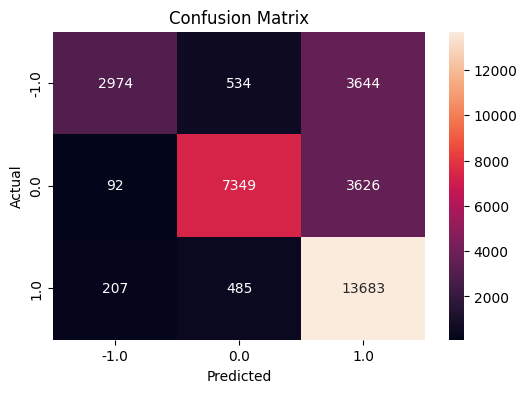

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
sample = ["I really love this service"]
sample_vector = vectorizer.transform(sample)

prediction = model.predict(sample_vector)
print("Sentiment:", prediction[0])


Sentiment: 1.0
